<a href="https://colab.research.google.com/github/fhsmartins/MBA/blob/main/Aula03/Pratica_Aula12_Metricas_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCC-ICMC-USP
# CURSO 2 - CD_AM_DM
## **Exemplo - MÉTRICAS DE AVALIAÇÃO**
#MBA em IA e BIGDATA
### Profa. Roseli A. F. Romero


**OBJETIVO**:
## Mostrar o uso de métricas: Acurácia, Precisão, Revocação, F1-score
## e Curvas ROC

In [1]:
#Carregar as bibliotecas
import pandas as pd #manipulação de dataset
from sklearn.preprocessing import LabelEncoder #pré-processamento
from sklearn.preprocessing import MinMaxScaler #padronização
from sklearn.neighbors import KNeighborsClassifier #classificador
from sklearn.model_selection import train_test_split #separando em dados teste e treinamento
from sklearn.metrics import classification_report # metricas de validação
from sklearn.metrics import accuracy_score #acuracia
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import f1_score #f1-score
from sklearn.metrics import roc_auc_score #area sob curva roc
from sklearn.metrics import roc_curve #curva roc
from sklearn.metrics import confusion_matrix #matriz de confusão
from matplotlib import pyplot #grafico

In [2]:
# Carregando o arquivo
url = 'https://raw.githubusercontent.com/scudilio/classification_metrics/master/dataset_Social_Network_Ads.csv'
data = pd.read_csv(url)
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#Calculando a média do numero de pessoas que compraram
data['Purchased'].sum()/data['Purchased'].count()

0.3575

In [4]:
# Criando variaveis independentes e dependentes
# utilizaremos apenas as variáveis numéricas

y = data['Purchased']
X = data.iloc[ :, [2,3]].values

In [5]:
# Normalização das variáveis
X = MinMaxScaler().fit_transform(X)

In [6]:
# Separando em treino e teste
x_treino, x_teste, y_treino,y_teste  = train_test_split(X, y, test_size = 0.25,random_state = 1)

In [7]:
knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [ ]:
#Calculando a matriz de confusão
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        50   8   58
1         4  38   42
All      54  46  100


In [ ]:
# Acurácia
acuracia = accuracy_score(y_teste, resultado_knn)
print('Acurácia: %f' % acuracia)

Acurácia: 0.880000


In [ ]:
# Precision
precision = precision_score(y_teste, resultado_knn)
print('Precision: %f' % precision)

Precision: 0.826087


In [ ]:
# Recall
recall = recall_score(y_teste, resultado_knn)
print('Recall: %f' % recall)

Recall: 0.904762


In [ ]:
# F1-Score
f1 = f1_score(y_teste, resultado_knn)
print('F1-Score: %f' % f1)

F1-Score: 0.863636


Analisando as métricas


In [ ]:
print(classification_report(y_teste, resultado_knn))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        58
           1       0.83      0.90      0.86        42

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



Área sob a curva ROC

In [ ]:
# Calculando a área AUC
auc = roc_auc_score(y_teste, resultado_knn)
print('AUC: %.3f' % auc)

AUC: 0.883


In [ ]:
# Calculando a taxa de fp, rfp, e a taxa de vp, rvp para fazer o gráfico
rfp, rvp, thresholds = roc_curve(y_teste, resultado_knn)

Gráfico da Curva ROC

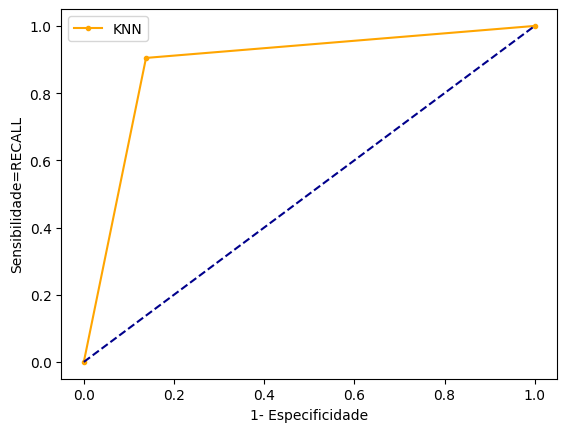

AUC-ROC : 0.883415435139573


In [ ]:
# gráfico da curva roc
pyplot.plot(rfp, rvp, marker='.', label='KNN',color="orange")
pyplot.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

# axis labels
pyplot.xlabel('1- Especificidade')
pyplot.ylabel('Sensibilidade=RECALL')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print("AUC-ROC :",auc)